In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
stock_data = pd.read_csv("D:VOF.L.csv",index_col = "Date",parse_dates = True)

In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046
2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823
2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623
2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329
2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108
...,...,...,...,...,...,...
2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108
2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303
2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574


In [4]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [5]:
nb_days = 60

n_features = 1

X, y = preprocess_lstm(df_close_shift.to_numpy(), nb_days, n_features)

NameError: name 'df_close_shift' is not defined

In [6]:
test_days = 365 

X_train, y_train = X[:-test_days], y[:-test_days]
X_test, y_test = X[-test_days:], y[-test_days:]

NameError: name 'X' is not defined

Text(0.5, 1.0, 'VNC stock closing price')

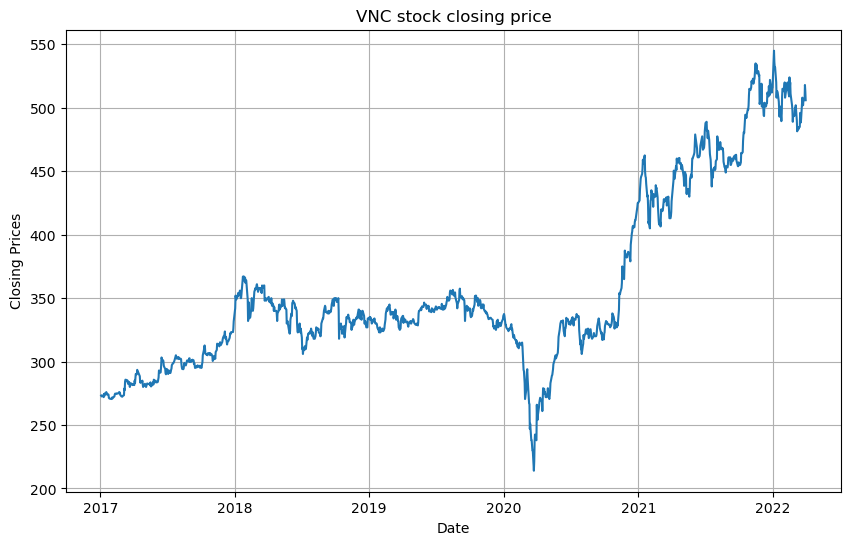

In [7]:
df_close = stock_data['Close']

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(df_close)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('VNC stock closing price')

In [8]:
def test_stationarity(timeseries):
    '''
    Input: timeseries (dataframe): timeseries for which we want to study the stationarity
    '''
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',\
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

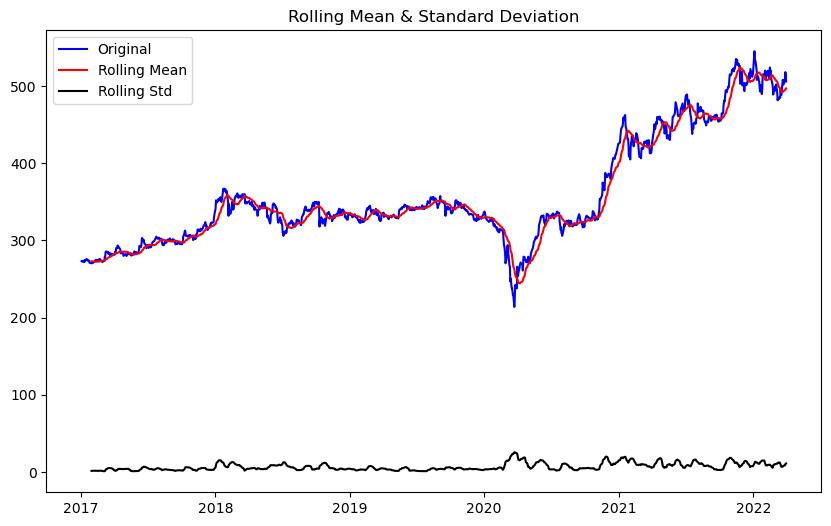

Results of Dickey-Fuller Test:
Test Statistic                   -0.458098
p-value                           0.899937
#Lags Used                        0.000000
Number of Observations Used    1327.000000
Critical Value (1%)              -3.435287
Critical Value (5%)              -2.863720
Critical Value (10%)             -2.567931
dtype: float64


In [9]:
plt.figure(figsize = (10,6))
test_stationarity(df_close.head(2000))

<Figure size 640x480 with 0 Axes>

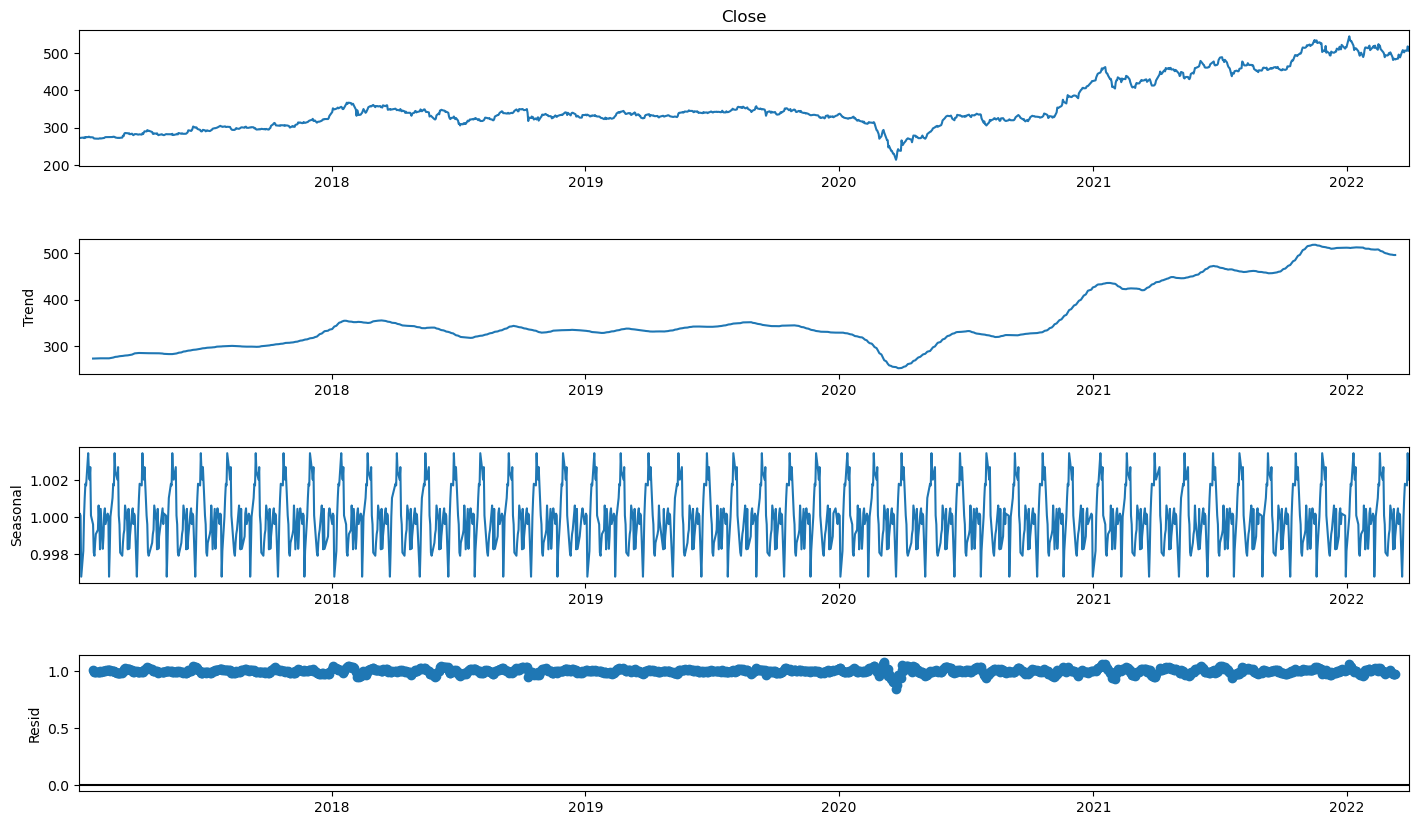

In [10]:
result = seasonal_decompose(df_close, model='multiplicative',period=28)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

Text(0.5, 1.0, 'Transformed data')

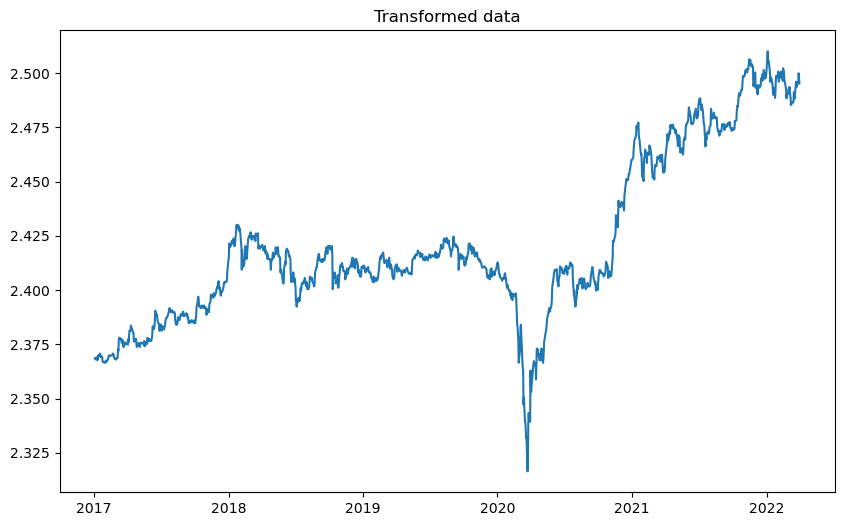

In [11]:
df_close_log = df_close.apply(np.log)
df_close_tf = df_close_log.apply(np.sqrt)

plt.figure(figsize = (10,6))
plt.plot(df_close_tf)
plt.title('Transformed data')

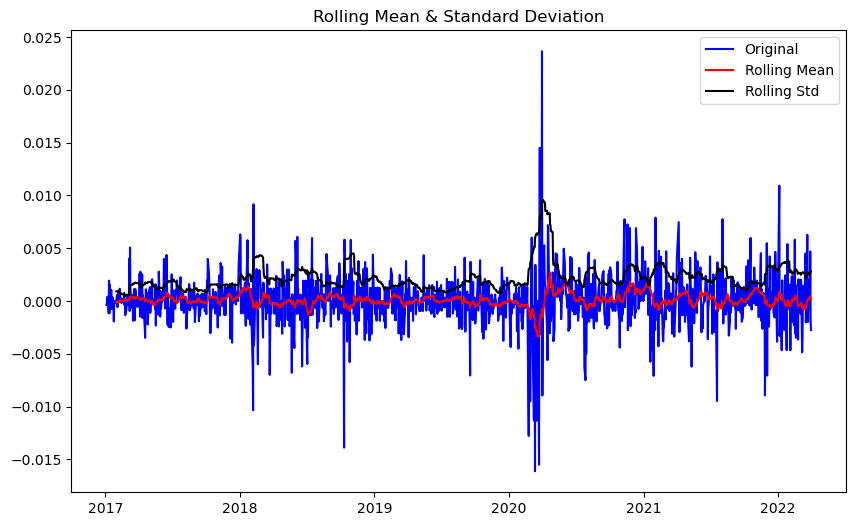

Results of Dickey-Fuller Test:
Test Statistic                -1.246156e+01
p-value                        3.397050e-23
#Lags Used                     8.000000e+00
Number of Observations Used    1.318000e+03
Critical Value (1%)           -3.435321e+00
Critical Value (5%)           -2.863735e+00
Critical Value (10%)          -2.567939e+00
dtype: float64


In [12]:
df_close_shift = df_close_tf - df_close_tf.shift()

df_close_shift.dropna(inplace=True)
plt.figure(figsize = (10,6))
test_stationarity(df_close_shift)

In [13]:
def preprocess_lstm(sequence, n_steps,n_features):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix >= len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)

    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, y

In [14]:
nb_days = 60

n_features = 1

X, y = preprocess_lstm(df_close_shift.to_numpy(), nb_days, n_features)

In [15]:
test_days = 365 

X_train, y_train = X[:-test_days], y[:-test_days]
X_test, y_test = X[-test_days:], y[-test_days:]

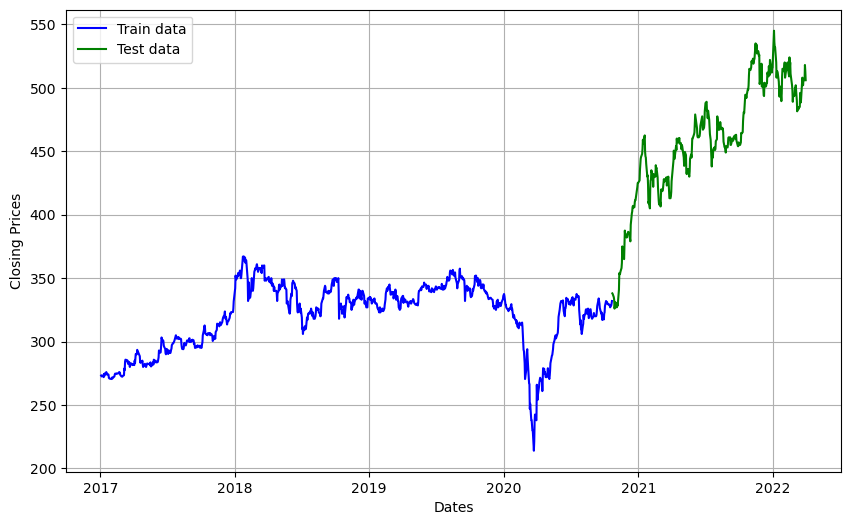

In [16]:
train_original = df_close.iloc[:-test_days]
test_original = df_close.iloc[-test_days:]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.legend()

In [17]:
def vanilla_LSTM():
    model = Sequential()    
    model.add(LSTM(units=50, input_shape=(nb_days, n_features)))
    model.add(Dense(1))
    return model

In [18]:
model = vanilla_LSTM()
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 32)

Epoch 1/15
29/29 [==============================] - 5s 31ms/step - loss: 2.2071e-05 - mean_absolute_error: 0.0036
Epoch 2/15
29/29 [==============================] - 1s 27ms/step - loss: 6.5629e-06 - mean_absolute_error: 0.0017
Epoch 3/15
29/29 [==============================] - 1s 32ms/step - loss: 6.5259e-06 - mean_absolute_error: 0.0016
Epoch 4/15
29/29 [==============================] - 1s 30ms/step - loss: 6.8299e-06 - mean_absolute_error: 0.0017
Epoch 5/15
29/29 [==============================] - 1s 29ms/step - loss: 6.8994e-06 - mean_absolute_error: 0.0018
Epoch 6/15
29/29 [==============================] - 1s 30ms/step - loss: 7.1731e-06 - mean_absolute_error: 0.0018
Epoch 7/15
29/29 [==============================] - 1s 30ms/step - loss: 6.7080e-06 - mean_absolute_error: 0.0017
Epoch 8/15
29/29 [==============================] - 1s 30ms/step - loss: 6.6011e-06 - mean_absolute_error: 0.0017
Epoch 9/15
29/29 [==============================] - 1s 31ms/step - loss: 6.4583e-06 - me

In [21]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=32)
print("Test MSE:", results[0])
print("Test MAE:", results[1])

Evaluate on test data
12/12 [==============================] - 0s 14ms/step - loss: 6.8718e-06 - mean_absolute_error: 0.0019
Test MSE: 6.871840923849959e-06
Test MAE: 0.0019125811522826552


12/12 [==============================] - 1s 14ms/step


NameError: name 'company' is not defined

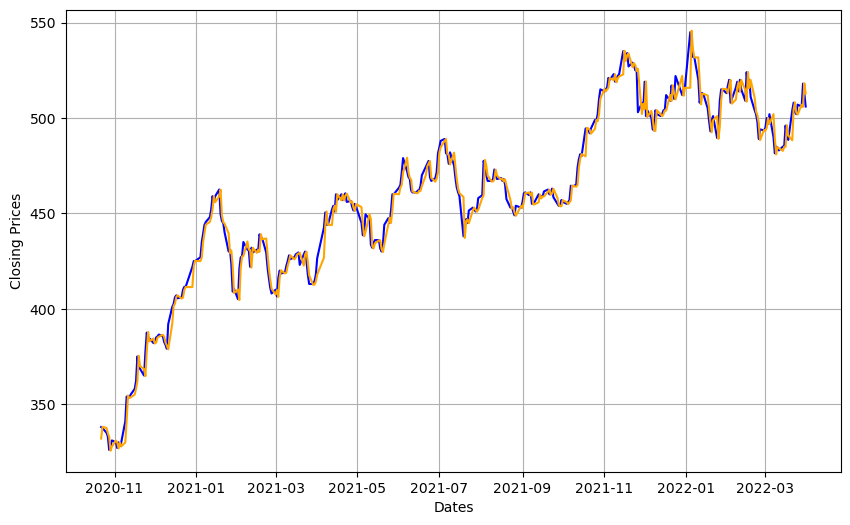

In [22]:
y_pred = model.predict(X_test)

pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])


pred_data['Close'] = pred_data['Close'] + df_close_tf.shift().values[-test_days:] 

pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_original,'b',label='Actual prices')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title(company + ' Stock Price')

plt.legend()

NameError: name 'company' is not defined

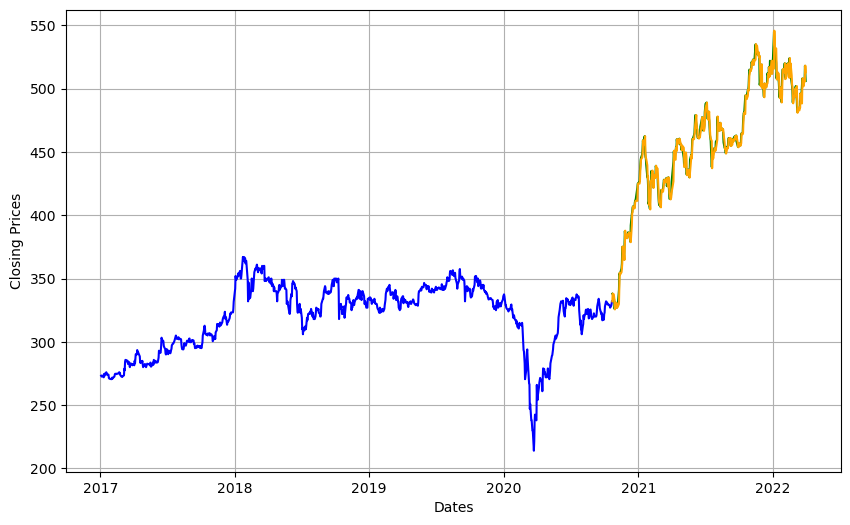

In [23]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.plot(pred_data, 'orange', label='Prediction')
plt.title(company + ' Stock Price')
plt.legend()

In [24]:
company = 'VinaCapital'

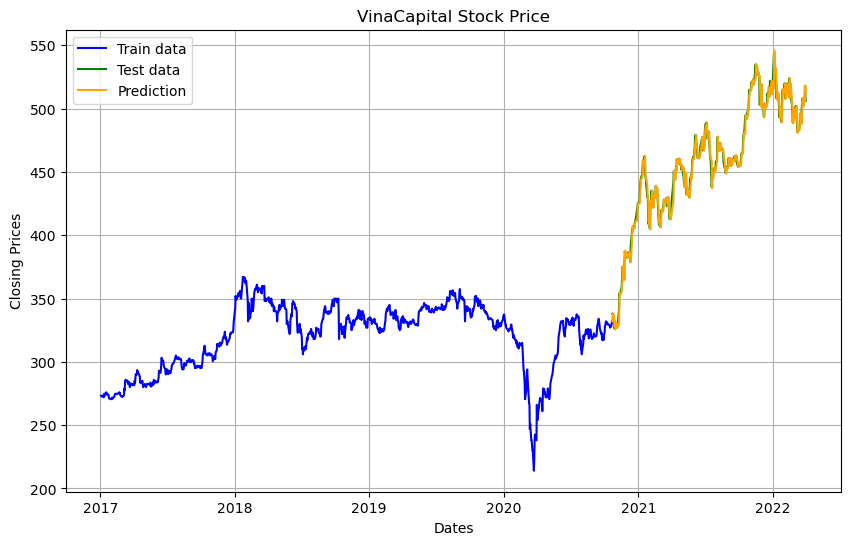

In [25]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.plot(pred_data, 'orange', label='Prediction')
plt.title(company + ' Stock Price')
plt.legend()

12/12 [==============================] - 0s 14ms/step


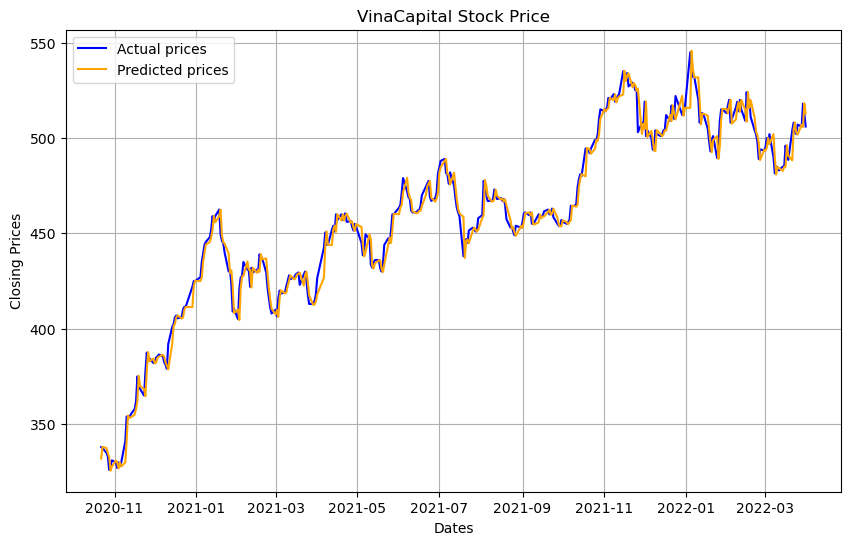

In [26]:
y_pred = model.predict(X_test)

pred_data = pd.DataFrame(y_pred[:,0], test_original.index,columns=['Close'])


pred_data['Close'] = pred_data['Close'] + df_close_tf.shift().values[-test_days:] 

pred_data = pred_data.apply(np.square)
pred_data = pred_data.apply(np.exp)


plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_original,'b',label='Actual prices')
plt.plot(pred_data, 'orange',label='Predicted prices')
plt.title(company + ' Stock Price')

plt.legend()

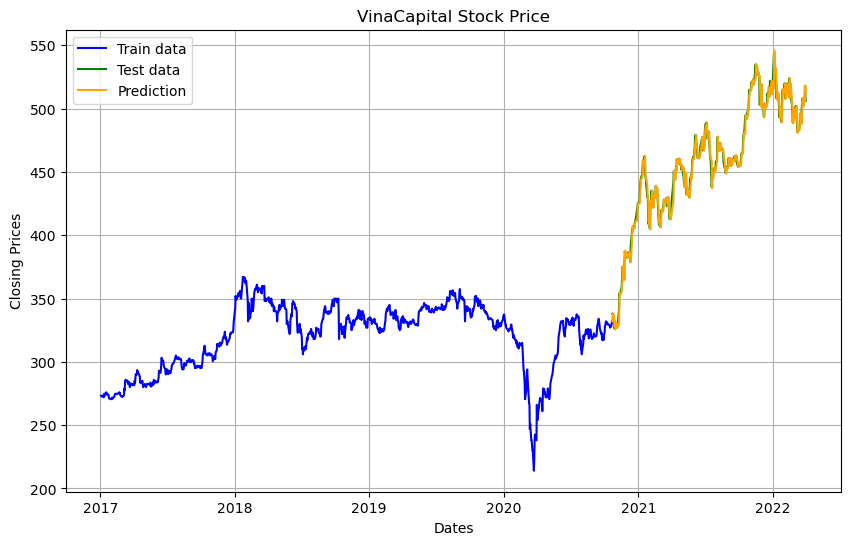

In [27]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_original, 'b', label='Train data')
plt.plot(test_original, 'g', label='Test data')
plt.plot(pred_data, 'orange', label='Prediction')
plt.title(company + ' Stock Price')
plt.legend()